In [1]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
Ecommerce = pd.read_csv('Ecommerce_DBS.csv')

In [41]:
Ecommerce.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta,55.000000,-115.000000
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario,50.000000,-85.000000
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico,34.840515,-106.248482
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan,55.000000,-106.000000
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California,36.116203,-119.681564


In [42]:
Ecommerce.columns.tolist()

['Customer ID',
 'Purchase Date',
 'Product Category',
 'Product Price',
 'Quantity',
 'Total Purchase Amount',
 'NPS',
 'Customer Age ',
 'Gender',
 'Source',
 'Country',
 'State',
 'Latitude',
 'Longituide']

In [44]:
Ecommerce.drop('Latitude', axis=1, inplace=True)

In [45]:
Ecommerce.drop('Longituide', axis=1, inplace=True)

In [46]:
Ecommerce.drop('State', axis=1, inplace=True)

In [47]:
Ecommerce.drop('Country', axis=1, inplace=True)

In [48]:
Ecommerce.tail()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source
249995,33308,10/08/2023,Clothing,279,2,2187,1,55,Male,SEM
249996,48835,23/11/2021,Home,27,1,3615,1,42,Female,Instagram Campign
249997,21019,02/07/2020,Home,17,5,2466,0,41,Male,Instagram Campign
249998,49234,30/12/2020,Books,398,2,3668,8,34,Female,Instagram Campign
249999,16971,13/03/2021,Electronics,425,4,2370,2,36,Female,Organic Search


In [49]:
Ecommerce.shape

(250000, 10)

In [50]:
Ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Customer ID            250000 non-null  int64 
 1   Purchase Date          250000 non-null  object
 2   Product Category       250000 non-null  object
 3   Product Price          250000 non-null  int64 
 4   Quantity               250000 non-null  int64 
 5   Total Purchase Amount  250000 non-null  int64 
 6   NPS                    250000 non-null  int64 
 7   Customer Age           250000 non-null  int64 
 8   Gender                 250000 non-null  object
 9   Source                 250000 non-null  object
dtypes: int64(6), object(4)
memory usage: 19.1+ MB


In [51]:
print(f"Temos {Ecommerce.shape[0]} linhas e {Ecommerce.shape[1]} colunas")

Temos 250000 linhas e 10 colunas


In [52]:
Ecommerce.loc[0]

Customer ID                          46251
Purchase Date                   08/09/2020
Product Category               Electronics
Product Price                           12
Quantity                                 3
Total Purchase Amount                  740
NPS                                      7
Customer Age                            20
Gender                                Male
Source                   Instagram Campign
Name: 0, dtype: object

In [53]:
Ecommerce.loc[[0,2]]

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM


In [54]:
mapeamento_colunas = {
    'Customer ID': 'ID do Cliente',
    'Purchase Date': 'Data da Compra',
    'Product Category': 'Categoria do Produto',
    'Product Price': 'Preço do Produto',
    'Quantity': 'Quantidade',
    'Total Purchase Amount': 'Valor Total da Compra',
    'NPS': 'NPS',
    'Customer Age ': 'Idade do Cliente',
    'Gender': 'Gênero',
    'Source': 'Origem',
    'Country': 'País',
}
Ecommerce = Ecommerce.rename(columns=mapeamento_colunas)

print(Ecommerce.columns)

Index(['ID do Cliente', 'Data da Compra', 'Categoria do Produto',
       'Preço do Produto', 'Quantidade', 'Valor Total da Compra', 'NPS',
       'Idade do Cliente', 'Gênero', 'Origem'],
      dtype='object')


In [55]:
Ecommerce = Ecommerce.rename(columns=mapeamento_colunas)
Ecommerce.head()

,ID do Cliente,Data da Compra,Categoria do Produto,Preço do Produto,Quantidade,Valor Total da Compra,NPS,Idade do Cliente,Gênero,Origem
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign


In [132]:
#Quais os produtos mais vendidos considerando os últimos 3 anos:

Ecommerce['Data da Compra'] = pd.to_datetime(Ecommerce['Data da Compra'], format='%d/%m/%Y')
data_3_anos_atras = pd.to_datetime('today') - pd.DateOffset(years=3)
compras_ultimos_3_anos = Ecommerce[Ecommerce['Data da Compra'] >= data_3_anos_atras]
vendas_por_categoria = compras_ultimos_3_anos.groupby('Categoria do Produto')['Quantidade'].sum().sort_values(ascending=False)
produto_mais_vendido = vendas_por_categoria.idxmax()
print("Os produtos mais vendidos nos últimos 3 anos é:", vendas_por_categoria)

Os produtos mais vendidos nos últimos 3 anos é: Categoria do Produto
Clothing       139438
Books          138448
Electronics     92389
Home            91719
Name: Quantidade, dtype: int64


In [102]:
#Produto mais caro e o mais barato

produto_mais_caro = Ecommerce.loc[Ecommerce['Preço do Produto'].idxmax()]

produto_mais_barato = Ecommerce.loc[Ecommerce['Preço do Produto'].idxmin()]

print("O produto mais caro é:")
print(produto_mais_caro)

print("\nO produto mais barato é:")
print(produto_mais_barato)


O produto mais caro é:
ID do Cliente                          30759
Data da Compra           2021-11-24 00:00:00
Categoria do Produto             Electronics
Preço do Produto                         500
Quantidade                                 5
Valor Total da Compra                   4498
NPS                                        7
Idade do Cliente                          21
Gênero                                Female
Origem                     Instagram Campign
Faixa Etária                           21-30
Name: 560, dtype: object

O produto mais barato é:
ID do Cliente                          20078
Data da Compra           2023-01-29 00:00:00
Categoria do Produto             Electronics
Preço do Produto                          10
Quantidade                                 3
Valor Total da Compra                   4274
NPS                                        9
Idade do Cliente                          21
Gênero                                  Male
Origem                    

In [103]:
#Qual a categoria de produto mais vendida e menos vendida
vendas_por_categoria = Ecommerce.groupby('Categoria do Produto')['Quantidade'].sum()

categoria_mais_vendida = vendas_por_categoria.idxmax()

categoria_menos_vendida = vendas_por_categoria.idxmin()

print("A categoria mais vendida é:", categoria_mais_vendida)
print("A categoria menos vendida é:", categoria_menos_vendida)

A categoria mais vendida é: Clothing
A categoria menos vendida é: Home


In [105]:
#Qual a categoria de produto mais cara e menos cara
vendas_por_categoria = Ecommerce.groupby('Categoria do Produto')['Preço do Produto'].sum()

categoria_mais_vendida = vendas_por_categoria.idxmax()

categoria_menos_vendida = vendas_por_categoria.idxmin()

print("A categoria mais cara é:", categoria_mais_vendida)
print("A categoria menos cara é:", categoria_menos_vendida)

A categoria mais cara é: Clothing
A categoria menos cara é: Home


In [90]:
# qual seria a melhor e pior NPS
nps_stats = compras_ultimos_3_anos.groupby('NPS').size()

melhor_nps = nps_stats.idxmax()
pior_nps = nps_stats.idxmin()

print("O melhor NPS nos últimos 3 anos é:", melhor_nps)
print("O pior NPS nos últimos 3 anos é:", pior_nps)

O melhor NPS nos últimos 3 anos é: 1
O pior NPS nos últimos 3 anos é: 4


In [107]:
#Produtos com pior e melhor NPS

nps_especifico = melhor_nps

compras_com_nps_especifico = Ecommerce[Ecommerce['NPS'] == nps_especifico]

produtos_com_nps_especifico = compras_com_nps_especifico['Categoria do Produto'].unique()

print(f"Os produtos com NPS {nps_especifico} são:")
print(produtos_com_nps_especifico)

Os produtos com NPS 1 são:
['Clothing' 'Books' 'Home' 'Electronics']


In [114]:
#Produtos com pior e melhor NPS

nps_por_categoria = Ecommerce.groupby('Categoria do Produto')['NPS'].mean()

categoria_maior = nps_por_categoria.idxmax()

categoria_menor = nps_por_categoria.idxmin()

print("O produto com melhor NPS é:")
print(categoria_maior)

print("\nO produto com menor NPS é:")
print(categoria_menor)

O produto com melhor NPS é:
Home

O produto com menor NPS é:
Electronics


In [187]:
#estátiticas de idade e genero que mais compra

idade_compra = Ecommerce['Idade do Cliente'].describe()
genero_compra = Ecommerce['Gênero'].value_counts()

print("Estatísticas de Idade:")
print(idade_compra)

print("\nTotal de compra por Gênero:")
print(genero_compra)

Estatísticas de Idade:
count    250000.000000
mean         43.759228
std          15.392075
min          18.000000
25%          30.000000
50%          44.000000
75%          57.000000
max          70.000000
Name: Idade do Cliente, dtype: float64

Total de compra por Gênero:
Gênero
Female    125560
Male      124440
Name: count, dtype: int64


In [182]:
# Compras por faixa etária
faixa_etaria_bins = [0, 20, 30, 40, 50, 60, 100]
faixa_etaria_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
Ecommerce['Faixa Etária'] = pd.cut(Ecommerce['Idade do Cliente'], bins=faixa_etaria_bins, labels=faixa_etaria_labels)
segmento_faixa_etaria = Ecommerce.groupby(['Faixa Etária', 'Gênero'], observed=False).size().unstack(fill_value=0)

print("Total de compras por faixa etária:")
print(segmento_faixa_etaria)

Total de compras por faixa etária:
Gênero        Female   Male
Faixa Etária               
0-20            7249   7345
21-30          24262  24430
31-40          23549  23041
41-50          23709  23208
51-60          23517  23071
60+            23274  23345


In [179]:
# Total de compras por origem 
fonte_origem = Ecommerce['Origem'].value_counts()

print("Total de Compras por Origem:")
print(fonte_origem)

Total de Compras por Origem:
Origem
Instagram Campign    70170
FaceBook campaign    66773
SEM                  66743
Organic Search       46314
Name: count, dtype: int64


In [96]:
#Teste de hipoteses:

In [97]:
from scipy.stats import f_oneway

faixa_etaria = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

df_faixa_etaria = [Ecommerce[Ecommerce['Faixa Etária'] == faixa] for faixa in faixa_etaria]

# Teste ANOVA
anova_result = f_oneway(*[df['Valor Total da Compra'] for df in df_faixa_etaria])

print("Resultado do Teste ANOVA:")
print("Estatística F:", anova_result.statistic)
print("Valor p:", anova_result.pvalue)

Resultado do Teste ANOVA:
Estatística F: 129.03907511497587
Valor p: 5.221387148404795e-137


In [98]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Convertendo os dados para o formato necessário para o teste de Tukey
data = []
labels = []
for i, df in enumerate(df_faixa_etaria):
    data.extend(df['Valor Total da Compra'])
    labels.extend([faixa_etaria[i]] * len(df))

# Realizando o teste de Tukey
tukey_result = pairwise_tukeyhsd(data, labels)

print(tukey_result)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  0-20  21-30  31.6563 0.1828  -7.0988  70.4114  False
  0-20  31-40  87.0809    0.0  48.1247  126.037   True
  0-20  41-50 119.6536    0.0  80.7298 158.5774   True
  0-20  51-60 179.5562    0.0 140.5998 218.5125   True
  0-20    60+ 227.0353    0.0  188.082 265.9886   True
 21-30  31-40  55.4245    0.0  28.8099  82.0392   True
 21-30  41-50  87.9973    0.0    61.43 114.5645   True
 21-30  51-60 147.8998    0.0 121.2849 174.5148   True
 21-30    60+  195.379    0.0 168.7685 221.9894   True
 31-40  41-50  32.5727 0.0073    5.713  59.4325   True
 31-40  51-60  92.4753    0.0  65.5684 119.3822   True
 31-40    60+ 139.9544    0.0  113.052 166.8569   True
 41-50  51-60  59.9026    0.0  33.0426  86.7626   True
 41-50    60+ 107.3817    0.0  80.5262 134.2372   True
 51-60    60+  47.4791    0.0  20.5764  74.3819   True
----------

In [ ]:
#O resultado do teste de Tukey mostra as diferenças significativas entre os grupos demográficos em termos de valor médio de compra. 
#Principais pontos a serem observados:

#Não há diferença significativa no valor médio de compra entre os grupos demográficos 0-20 e 21-30.
#Existem diferenças significativas entre o grupo demográfico 0-20 e os grupos demográficos 31-40, 41-50, 51-60 e 60+.
#Existem diferenças significativas entre o grupo demográfico 21-30 e os grupos demográficos 31-40, 41-50, 51-60 e 60+.
#Existem diferenças significativas entre o grupo demográfico 31-40 e os grupos demográficos 41-50, 51-60 e 60+.
#Existem diferenças significativas entre o grupo demográfico 41-50 e os grupos demográficos 51-60 e 60+.
#Esses resultados sugerem que a idade tem um impacto significativo no comportamento de compra, com diferenças significativas no valor médio de compra entre diferentes faixas etárias.

In [99]:
# Origens de compra
origens = ['Instagram Campign', 'FaceBook campaign', 'SEM', 'Organic Search']

# DataFrames para cada origem de compra
df_origens = [Ecommerce[Ecommerce['Origem'] == origem] for origem in origens]

# Teste ANOVA
anova_result_origens = f_oneway(*[df['Valor Total da Compra'] for df in df_origens])

print("Resultado do Teste ANOVA para Origens de Compra:")
print("Estatística F:", anova_result_origens.statistic)
print("Valor p:", anova_result_origens.pvalue)

# com base no teste ANOVA, não podemos concluir que existe uma diferença significativa no valor médio de compra entre as diferentes origens de compra.
#Isso significa que, com base nos dados disponíveis, não há evidências suficientes para sugerir que a origem da compra tenha um impacto significativo no valor médio de compra.

Resultado do Teste ANOVA para Origens de Compra:
Estatística F: 0.22546226960413357
Valor p: 0.8787433466505977


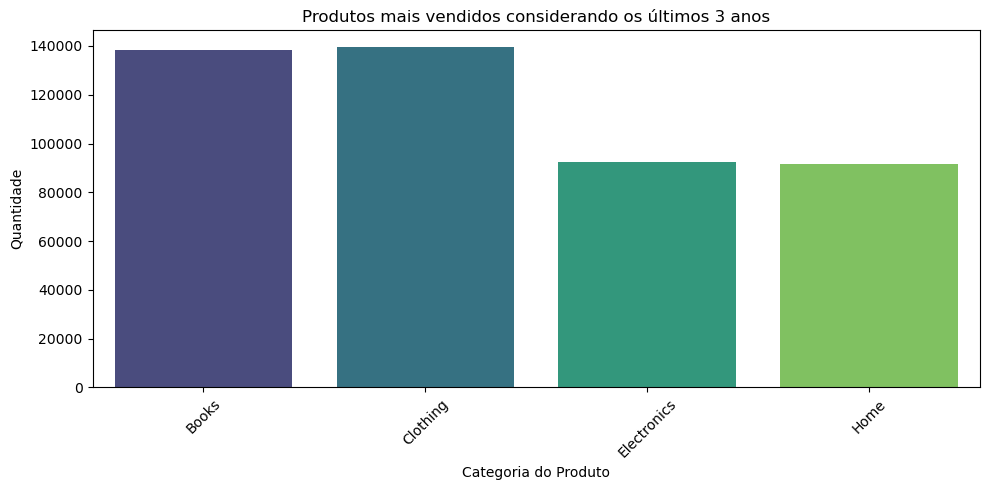

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

vendas_por_categoria = compras_ultimos_3_anos.groupby('Categoria do Produto')['Quantidade'].sum()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette="viridis")
plt.title('Produtos mais vendidos considerando os últimos 3 anos')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

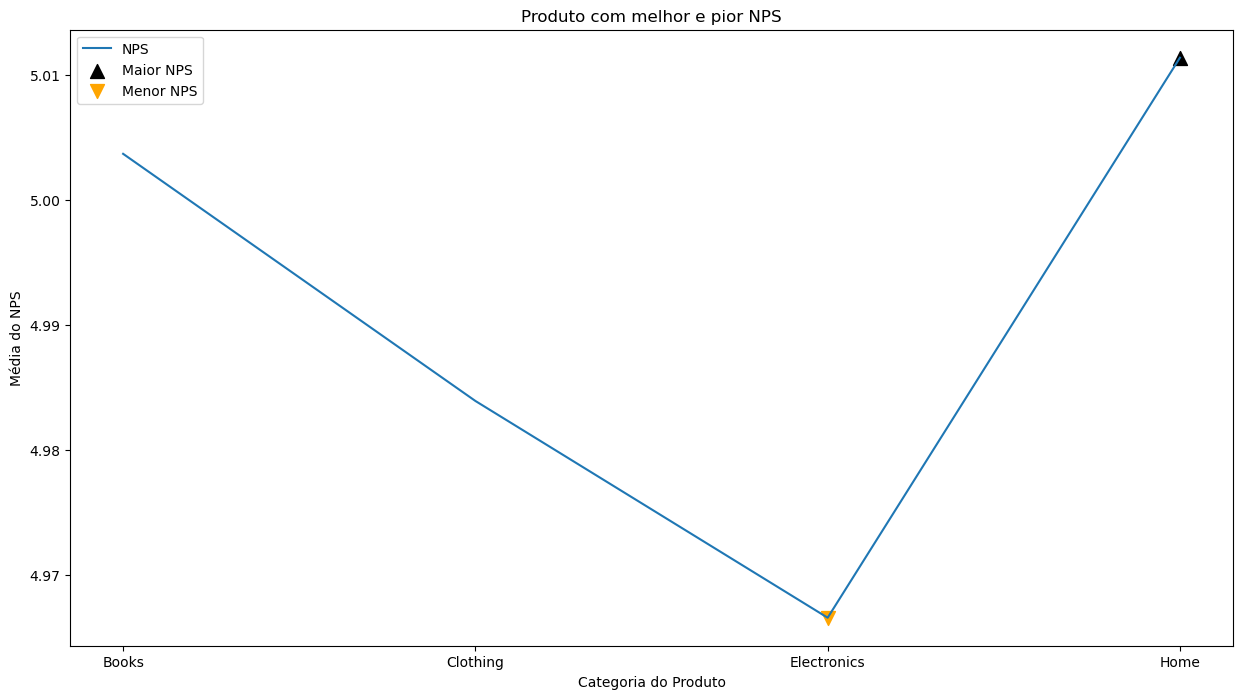

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

pior_e_melhor_nps = Ecommerce.groupby('Categoria do Produto')['NPS'].mean()

# Plotar o gráfico de linhas
plt.figure(figsize=(15, 8))
plt.plot(pior_e_melhor_nps.index, pior_e_melhor_nps.values, label='NPS')
plt.scatter(categoria_maior, pior_e_melhor_nps[categoria_maior], color='black', label='Maior NPS', marker='^', s=100)
plt.scatter(categoria_menor, pior_e_melhor_nps[categoria_menor], color='orange', label='Menor NPS', marker='v', s=100)
plt.xlabel('Categoria do Produto')
plt.ylabel('Média do NPS')
plt.title('Produto com melhor e pior NPS')
plt.legend()
plt.show()

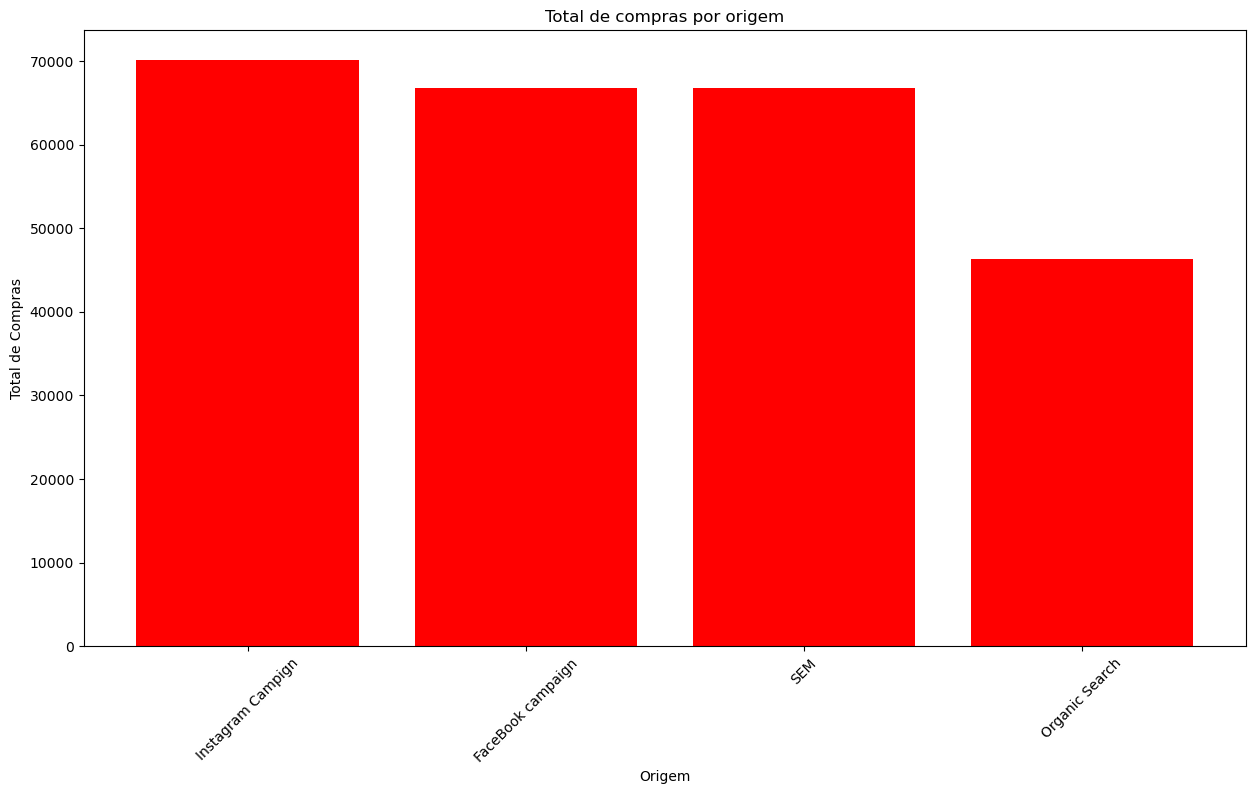

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

fonte_origem = Ecommerce['Origem'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(15, 8))
plt.bar(fonte_origem.index, fonte_origem.values, color='red')
plt.xlabel('Origem')
plt.ylabel('Total de Compras')
plt.title('Total de compras por origem')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x800 with 0 Axes>

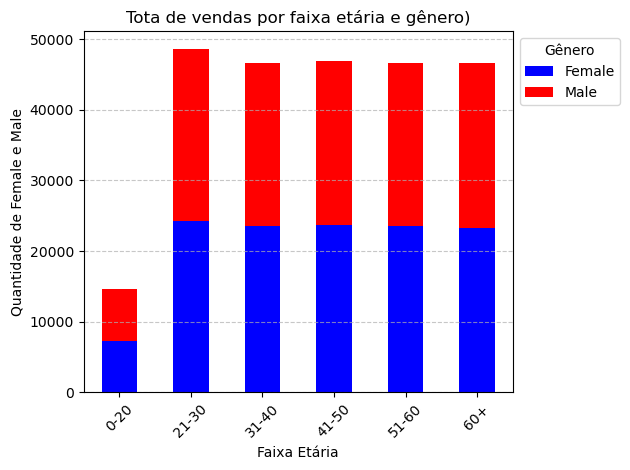

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

faixa_etaria_bins = [0, 20, 30, 40, 50, 60, 100]
faixa_etaria_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
Ecommerce['Faixa Etária'] = pd.cut(Ecommerce['Idade do Cliente'], bins=faixa_etaria_bins, labels=faixa_etaria_labels)
segmento_faixa_etaria = Ecommerce.groupby(['Faixa Etária', 'Gênero'], observed=False).size().unstack(fill_value=0)

# Plotar o gráfico de barras
plt.figure(figsize=(15, 8))
segmento_faixa_etaria.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Female e Male')
plt.title('Tota de vendas por faixa etária e gênero)')
plt.xticks(rotation=45)
plt.legend(title='Gênero', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

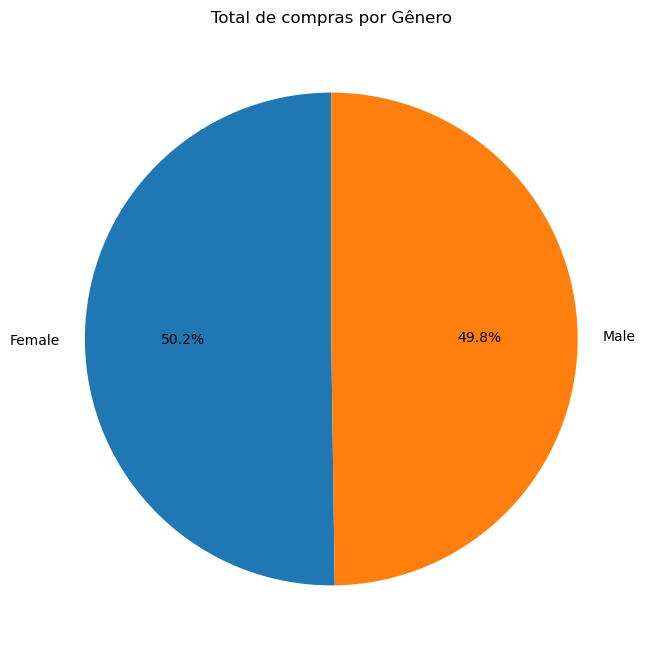

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

genero_compra = Ecommerce['Gênero'].value_counts()

# Plotar o gráfico de tortas
plt.figure(figsize=(8, 8))
plt.pie(genero_compra.values, labels=genero_compra.index, autopct='%1.1f%%', startangle=90)
plt.title('Total de compras por Gênero')
plt.show()

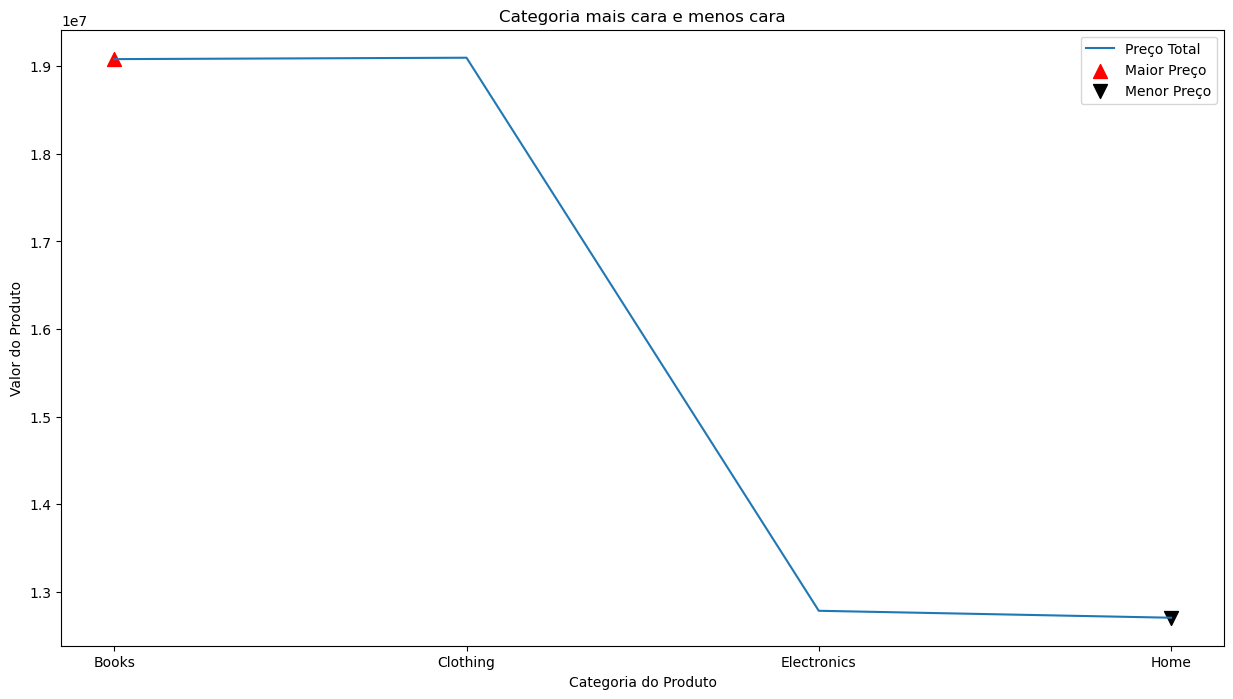

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

vendas_por_categoria = Ecommerce.groupby('Categoria do Produto')['Preço do Produto'].sum()

# Plotar o gráfico de linhas
plt.figure(figsize=(15, 8))
plt.plot(vendas_por_categoria.index, vendas_por_categoria.values, label='Preço Total')
plt.scatter(categoria_mais_vendida, vendas_por_categoria[categoria_mais_vendida], color='red', label='Maior Preço', marker='^', s=100)
plt.scatter(categoria_menos_vendida, vendas_por_categoria[categoria_menos_vendida], color='black', label='Menor Preço', marker='v', s=100)
plt.xlabel('Categoria do Produto')
plt.ylabel('Valor do Produto')
plt.title('Categoria mais cara e menos cara')
plt.legend()
plt.show()